In [4]:
# Importing libraries
import numpy as np
import matplotlib as mlp
import pandas as pd
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [5]:
# (It is O.K. to set these parameters directly within the source code, please do not implement a user interface for that.)
n = 3 # Number of layers
Learning_rate = [0.1, 0.05] # learning rate for each layer (excluding Input layer)
iteration = 1000 # number of iterations
layers_num_neuron = []
Transfer_func = []
Der_Transfer_func = []


In [6]:
def FermiFunction(z):
  # Logistic Function
  f = 1/(1+np.exp(-z))
  return f

In [7]:
def FermiFunctionDerivative(z):
  # Derivative of logistic function
  f = FermiFunction(z)
  fprime= f *(1 - f)
  return fprime

In [8]:
def tanh(z):
  # Tanh
  t = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
  return t

In [9]:
def tanhDerivative(z):
  # Derivative of Tanh 
  t = 1 - tanh(z)**2
  return t

In [10]:
def Identity(z):
  # Identity function
  return z

In [11]:
def IdentityDerivative(z):
  # Derivative of Identity function
  return 1

In [12]:
def Feedforward(layers_num_neuron, X, weights):
  # In this function, we compute the output of each layer by multiplying the neurons 
  # of the last layer with corresponding weights.
  global Transfer_func
  out_final = {}
  net = np.zeros((len(layers_num_neuron)-1, np.max(layers_num_neuron)))
  fnet = np.zeros((len(layers_num_neuron)-1, np.max(layers_num_neuron)))
  for i in range(len(layers_num_neuron)-1):
    if i == 0:
      net[i][:layers_num_neuron[i+1]] = weights[i].dot(X)
    else:
      net[i][:layers_num_neuron[i+1]] = weights[i].dot(fnet[i-1][:layers_num_neuron[i]])
    
      
    fnet[i][:layers_num_neuron[i+1]] = Transfer_func[i-1](net[i][:layers_num_neuron[i+1]])
  
  
  return net, fnet
  

In [13]:

def Update(layers_num_neuron, weights, delta):
  # In this function we are going to update weights by adding the deltas
  for i in range(len(layers_num_neuron)-1):
    weights[i] = weights[i] + delta[i]
  return weights
    

In [14]:
def Backpropagation(X, Y, layers_num_neuron, net, fnet, weights):
  # In this function, the weights are trained using delta-rule
  global Learning_rate, Transfer_func, Der_Transfer_func
  delta = {}
  error = 0
  s_delta =  np.zeros((len(layers_num_neuron)-1, np.max(layers_num_neuron)))
  # Computing delta for weights
  for i in range(len(layers_num_neuron)-1, 0, -1):
    # Computing error and delta for the hidden-last layer
    if i+1 == len(layers_num_neuron):
      error = Y - fnet[i-1][:layers_num_neuron[i]]
      for j in range(len(error)): 
        # delta_weight = learning_rate * error * f'(net) * out_previous_layer
        delta_last_neuron_j = Learning_rate[i-1]*error[j]*Der_Transfer_func[i-1](net[i-1][j])*fnet[i-2][:layers_num_neuron[i-1]]
        s_delta[i-1][j] = error[j]*Der_Transfer_func[i-1](net[i-1][j])
        if (i-1) in delta.keys():
          delta[i-1].append(delta_last_neuron_j)
        else:
          delta[i-1] = [delta_last_neuron_j]
    # Computing error and delta for weights between hidden layers and first-hidden layer
    else:
      weight = weights[i]
      for j in range(layers_num_neuron[i]): 
        back_error = 0
        # Backpropagating the error from next layer, Sh = (zigma Sk * Whk)*f'(net)
        for k in range(layers_num_neuron[i+1]):
          back_error = back_error + s_delta[i][k]*weight[k][j]
        back_error = back_error*Der_Transfer_func[i-1](net[i-1][j])
        # delta_weight = learning_rate * Sh * input (For weights between first-hidden layer)
        if i-1 == 0:
          delta_last_neuron_j = Learning_rate[i-1]*back_error*X
        # delta_weight = learning_rate * Sh * out_previous_layer (For weights between hidden-hidden layer)
        else:
          delta_last_neuron_j = Learning_rate[i-1]*back_error*fnet[i-2][:layers_num_neuron[i-1]]
        s_delta[i-1][j] = back_error
        if (i-1) in delta.keys():
          delta[i-1].append(delta_last_neuron_j)
        else:
          delta[i-1] = [delta_last_neuron_j]

  return Update(layers_num_neuron, weights, delta)






In [15]:
# Reading File 1
df = pd.read_csv("PA-B_training_data_01.txt", sep=" ", header=None,skiprows=2)
m = 1 #number of neurons in the last layer
n = 2 #layers_number
df1 = df.dropna(axis=1)
df1.head()
X=df1.iloc[:,:n].values
Y=df1.iloc[:,n:(n+m)].values


In [16]:
# Reading File 2
df = pd.read_csv("PA-B_training_data_02.txt", sep=" ", header=None,skiprows=2)
m = 1 #number of neurons in the last layer
n = 2 #layers_number
df1 = df.dropna(axis=1)
X=df1.iloc[:,:n].values
Y=df1.iloc[:,n:(n+m)].values



In [19]:
# Reading File 3
df = pd.read_csv("PA-B_training_data_03.txt", sep=' ' ,error_bad_lines=True, header=None, skiprows=2)
m = 2 #number of neurons in the last layer
n = 4 #layers_number
df1 = df.dropna(axis=1)

X = df1.iloc[:, :n].values
Y = df1.iloc[:,n:(n+m)].values


In [23]:
# Reading File 4

values = open('PA-B_training_data_04.txt').read().split()
m = 1 #number of neurons in the last layer
n = 2 #layers_number
X, Y = [], []

for i in range(6, len(values), 3):
  X.append([values[i], values[i+1]])
  Y.append(values[i+2])

X = np.array(X).astype(np.float)
Y = np.array(Y).astype(np.float)


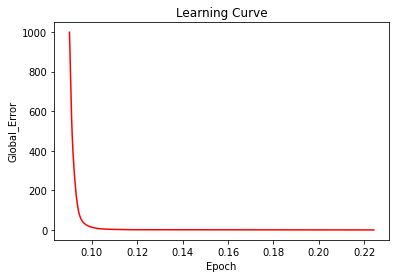

In [24]:
layers_num_neuron = [n+1, 3, m] # Number of layers (<= 4) and neurons in each layer 
Transfer_func = [FermiFunction, tanh] # learning rate for each layer (excluding Input layer)
Der_Transfer_func = [FermiFunctionDerivative, tanhDerivative]# Derivative of Transfer function for each layer (excluding Input layer)

W={}
# Generate initial weights with the same seed 
for i in range(len(layers_num_neuron)-1):
  prng = RandomState(i*1000)
  W[i] = prng.uniform(low = -2.0 , high = 2.001 , size = (layers_num_neuron[i+1], layers_num_neuron[i]) ) 

if len(X) <= 1000:
  e=[]
  for k in range(iteration):
    Global_Error, error = 0, 0
    # Read one of the files first, then begin the training
    for i in range(len(X)):
      # Adding bias
      x = np.array(list([1]) + list(X[i]))
      net, fnet = Feedforward(layers_num_neuron, x, W)
      error = error + (Y[i] - fnet[-1][:layers_num_neuron[-1]])**2
      W = Backpropagation(x, Y[i], layers_num_neuron, net, fnet, W)
    Global_Error = np.sum(error)/len(X)
    e.append(Global_Error)
    # Writing Global Error on learning curve.txt
    if k == 0:
      f = open("learning curve.txt", "w")
    else:
      f = open("learning curve.txt", "a")
    string = 'Eppoch ' + str(k) + '==> Global_Error ' + str(Global_Error) + '\n'
    f.write(string)
    f.close()

  plt.plot(e, np.arange(iteration), 'r')
  plt.xlabel("Epoch")
  plt.ylabel("Global_Error")
  plt.title("Learning Curve")
  plt.show()